### Purpose: Compute a range of normalization factors for Quadrupole Moment Aniso Sum and Dipole Moment Aniso Sum and plot this range against Spectral Aniso Matrix Sum

Import Dependencies

In [82]:
import helpers
import json
import pprint
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

import importlib
importlib.reload(helpers) #Reload helpers if necessary

<module 'helpers' from 'c:\\Users\\John\\Desktop\\University of Washington\\Seidler lab\\Factor_Dictionary\\helpers.py'>

#### Remove all Factor dfs that do not have an oxidation state

#### Load up Qm and Dm Aniso dfs

In [83]:
Cr_oxide_fd_path = "Cr_oxide_data/Cr_oxide_fd_3_29_2025"
normalization_orders = [1,2,3,4,5,6,7,8,9,10,11,12,13]

factor_df = helpers.generate_factor_df(Cr_oxide_fd_path, quadrupole=True, dipole=True, normalization_orders=normalization_orders)

print(factor_df)

             Chem Formula    Cif Name  Space Group Number  DM Norm 1/r^1 0  \
Material                                                                     
mp-1024044        Mg3CrO4  mp-1024044                 221    -2.166663e-16   
mp-1030818      NaMg6CrO8  mp-1030818                 123     1.332268e-15   
mp-1031027      LiMg6CrO8  mp-1031027                 123     3.108624e-15   
mp-1031245       KMg6CrO8  mp-1031245                 123    -8.881784e-16   
mp-1031428      Mg6TiCrO8  mp-1031428                 123    -8.881784e-16   
...                   ...         ...                 ...              ...   
mp-861240      Li3Al2CrO6   mp-861240                  12    -1.936241e-04   
mp-861612      CrFe(PO4)2   mp-861612                  11     2.243015e-15   
mp-866101          AcCrO3   mp-866101                 221     4.239143e-16   
mp-867746      CrCu(PO4)2   mp-867746                  11     2.204420e+00   
mp-884288   Li4Ti4V4CrO18   mp-884288                  55     3.

#### Load up spectra df

In [84]:
Cr_oxide_a_matrix_path = "Cr_oxide_data/a_matrix_data/Cr-oxide_aniso_results.json"

spectra_df = helpers.load_anisotropy_matrix_json(Cr_oxide_a_matrix_path)
spectra_df = helpers.compute_normed_off_diagonal_sum(spectra_df)

print(spectra_df)

            m00       m01       m02       m10  m11       m12       m20  \
Material                                                                 
mp-1024044  0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
mp-1030818  0.0  0.017070  0.017070  0.017070  0.0  0.000000  0.017070   
mp-1030883  0.0  0.006363  0.006363  0.006363  0.0  0.000000  0.006363   
mp-1031027  0.0  0.011899  0.011899  0.011899  0.0  0.000000  0.011899   
mp-1031245  0.0  0.009179  0.009179  0.009179  0.0  0.000000  0.009179   
...         ...       ...       ...       ...  ...       ...       ...   
mp-861612   0.0  0.004258  0.006477  0.004258  0.0  0.004184  0.006477   
mp-866101   0.0  0.000001  0.000000  0.000001  0.0  0.000001  0.000000   
mp-867746   0.0  0.005296  0.003213  0.005296  0.0  0.005599  0.003213   
mp-884288   0.0  0.005434  0.006526  0.005434  0.0  0.009060  0.006526   
mp-996996   0.0  0.000178  0.004386  0.000178  0.0  0.004564  0.004386   

                 m21  m22  Off Diagon

In [85]:
print(factor_df)

             Chem Formula    Cif Name  Space Group Number  DM Norm 1/r^1 0  \
Material                                                                     
mp-1024044        Mg3CrO4  mp-1024044                 221    -2.166663e-16   
mp-1030818      NaMg6CrO8  mp-1030818                 123     1.332268e-15   
mp-1031027      LiMg6CrO8  mp-1031027                 123     3.108624e-15   
mp-1031245       KMg6CrO8  mp-1031245                 123    -8.881784e-16   
mp-1031428      Mg6TiCrO8  mp-1031428                 123    -8.881784e-16   
...                   ...         ...                 ...              ...   
mp-861240      Li3Al2CrO6   mp-861240                  12    -1.936241e-04   
mp-861612      CrFe(PO4)2   mp-861612                  11     2.243015e-15   
mp-866101          AcCrO3   mp-866101                 221     4.239143e-16   
mp-867746      CrCu(PO4)2   mp-867746                  11     2.204420e+00   
mp-884288   Li4Ti4V4CrO18   mp-884288                  55     3.

#### Clean and allign dfs

In [86]:
factor_df, spectra_df, dropped_factor_df = helpers.align_dataframes(factor_df, spectra_df)

Dropped 1              Chem Formula    Cif Name  Space Group Number  DM Norm 1/r^1 0  \
Material                                                                     
mp-1182406       CrHSe3O8  mp-1182406                  14     4.091481e+00   
mp-1183712         CrGeO3  mp-1183712                 221    -3.108624e-15   
mp-1212562  NaCrH12(SO4)2  mp-1212562                 205     3.747003e-16   
mp-1227753    Ca4CrFe3O10  mp-1227753                  14     1.110223e-15   
mp-1369597    Li2CrSi7O16  mp-1369597                   1    -4.239746e+00   
mp-771329       Na3CrPCO7   mp-771329                   4    -1.113561e+01   
mp-772100      CrSn(PO4)2   mp-772100                  11     1.710028e-03   
mp-780708         Na5CrO4   mp-780708                  59    -9.138214e+00   

            DM Norm 1/r^1 1  DM Norm 1/r^1 2  Aniso DM 1/r^1 0  \
Material                                                         
mp-1182406     3.278663e+00     5.740733e+00               0.0   
mp-1183712 

#### Display dfs

In [87]:
print("factor_df")
print(factor_df.head(5))
print(factor_df.tail(5))
print("spectra_df")
print(spectra_df.head(5))
print(spectra_df.tail(5))
print(factor_df.shape[0])
print(spectra_df.shape[0])

factor_df
           Chem Formula    Cif Name  Space Group Number  DM Norm 1/r^1 0  \
Material                                                                   
mp-1024044      Mg3CrO4  mp-1024044                 221    -2.166663e-16   
mp-1030818    NaMg6CrO8  mp-1030818                 123     1.332268e-15   
mp-1031027    LiMg6CrO8  mp-1031027                 123     3.108624e-15   
mp-1031245     KMg6CrO8  mp-1031245                 123    -8.881784e-16   
mp-1031428    Mg6TiCrO8  mp-1031428                 123    -8.881784e-16   

            DM Norm 1/r^1 1  DM Norm 1/r^1 2  Aniso DM 1/r^1 0  \
Material                                                         
mp-1024044    -8.881784e-16     0.000000e+00               0.0   
mp-1030818     4.440892e-16    -4.440892e-16               0.0   
mp-1031027    -1.110223e-15     1.554312e-15               0.0   
mp-1031245    -1.221245e-15     1.535539e-15               0.0   
mp-1031428     1.110223e-15     2.652577e-16               0.

Look for clusters that have Nitrogen

In [88]:
factor_df_with_N = factor_df[factor_df["Chem Formula"].str.contains(r'N[^a-z]', na=False)]

print(factor_df_with_N["Chem Formula"])
print(factor_df_with_N.shape[0])


Material
mp-1105281         Cr(NO2)2
mp-1178448         Cr(NO3)5
mp-1204986      CrH10N2Cl5O
mp-1213562    DyCrC6(N3O2)2
mp-1213741           CrN3O8
mp-1213765        CrH14N3O8
mp-1226401       CrH8C4NO10
mp-728273       CrH14N4Cl3O
mp-728425        CrH8(NO2)2
mp-798760     CrH10S2(NO2)4
Name: Chem Formula, dtype: object
10


#### Get space groups

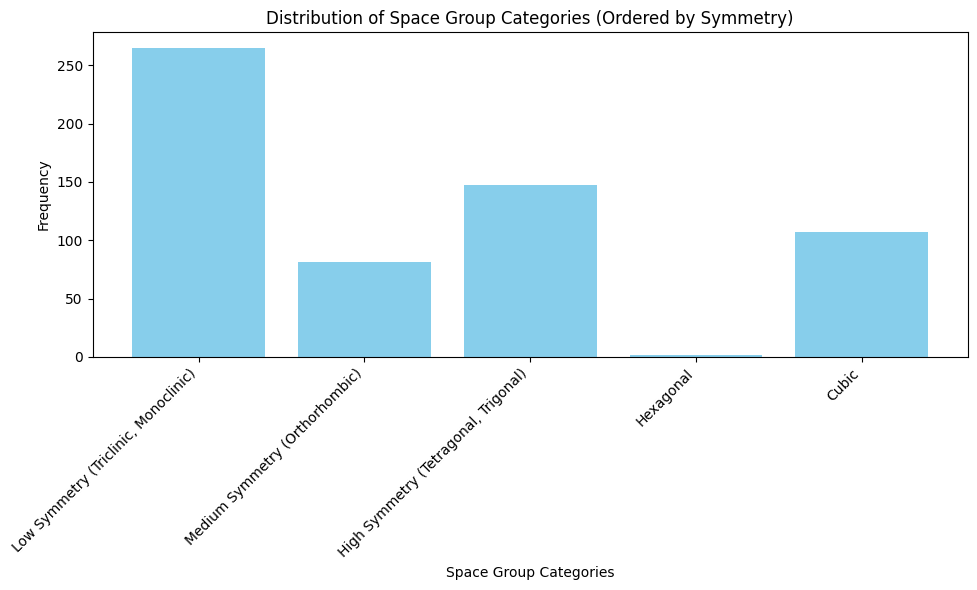

In [89]:
def generate_spacegroup_dict_from_df(factor_df):
    """
    Generate a dictionary mapping MP-ID to space groups and their categories from a factor DataFrame.

    Parameters:
        factor_df (pd.DataFrame): DataFrame containing 'MP-ID' and 'Space Group Number'.

    Returns:
        dict: A dictionary where keys are MP-IDs and values are tuples of (space group number, category).
    """
    
    def group_space_group(space_group_number):
        """Categorizes space groups based on symmetry level."""
        if 1 <= space_group_number <= 15:
            return "Low Symmetry (Triclinic, Monoclinic)"
        elif 16 <= space_group_number <= 74:
            return "Medium Symmetry (Orthorhombic)"
        elif 75 <= space_group_number <= 167:
            return "High Symmetry (Tetragonal, Trigonal)"
        elif 168 <= space_group_number <= 194:
            return "Hexagonal"
        elif 195 <= space_group_number <= 230:
            return "Cubic"
        else:
            return "Unknown"

    # Extract MP-ID and Space Group Number
    spacegroup_dict = {}
    
    for mp_id, row in factor_df.iterrows():
        space_group_number = row["Space Group Number"]
        category = group_space_group(space_group_number)
        spacegroup_dict[mp_id] = (space_group_number, category)

    return spacegroup_dict

def plot_space_group_distribution(spacegroup_dict):
    """
    Plot the distribution of space group categories, ordered from least to most symmetric.

    Parameters:
        spacegroup_dict (dict): A dictionary where values are tuples of (space group number, category).
    """
    # Extract categories from the dictionary
    categories = [group for _, group in spacegroup_dict.values()]

    # Count occurrences of each category
    category_counts = {}
    for category in categories:
        category_counts[category] = category_counts.get(category, 0) + 1

    # Define custom order: least to most symmetric
    custom_order = [
        "Low Symmetry (Triclinic, Monoclinic)",
        "Medium Symmetry (Orthorhombic)",
        "High Symmetry (Tetragonal, Trigonal)",
        "Hexagonal",
        "Cubic",
    ]

    # Sort categories by the custom order
    ordered_counts = {cat: category_counts.get(cat, 0) for cat in custom_order}

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    plt.bar(ordered_counts.keys(), ordered_counts.values(), color="skyblue")
    plt.xlabel("Space Group Categories")
    plt.ylabel("Frequency")
    plt.title("Distribution of Space Group Categories (Ordered by Symmetry)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

space_group = generate_spacegroup_dict_from_df(factor_df)
plot_space_group_distribution(space_group)

### Create a df for a specific space group

In [90]:
def get_group_df(low , high, factor_df, normalization):
    
    group = {}

    for key, value in space_group.items():
        if low < value[0] < high:
            group[key] = value  # Store the entire value list/tuple

    # Convert dictionary to DataFrame
    group_df = pd.DataFrame.from_dict(group, orient='index')

    # Name columns
    group_df.columns = ["Space Group", "Group Name"]

    # Name the index
    group_df.index.name = "Materials"

    # Find the intersection of indexes with factor dict
    common_indexes = group_df.index.intersection(factor_df.index)

    # Extract the "Aniso Sum QM" column for the common indexes
    qm_aniso_sum = factor_df.loc[common_indexes, f"Aniso Sum QM {normalization}"]

    # Add the extracted column to group_df
    group_df.loc[common_indexes, f"Aniso Sum QM {normalization}"] = qm_aniso_sum

    # Find the intersection of indexes with sepctra df
    common_indexes = group_df.index.intersection(spectra_df.index)

    # Extract the "Aniso Sum QM" column for the common indexes
    spectra_aniso_sum = spectra_df.loc[common_indexes, "Anisotropy Matrix Sum"]

    # Add the extracted column to group_df
    group_df.loc[common_indexes, "Normed Spectra Aniso Sum"] = spectra_aniso_sum

    # Add a column for the difference between the last two columns
    group_df["Difference Aniso Sum"] = np.abs(group_df[f"Aniso Sum QM {normalization}"] - group_df["Normed Spectra Aniso Sum"])

    return group_df

#### Plot the Spectra Aniso Sum v QM Qaniso Sum for ranging 1/r^n normalizations

In [95]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

def plot_aniso_data_side_by_side(df_dict, x_col, y_col, labels=True, main_title="Title", threshold_fraction = 0.1):
    """
    Plots multiple scatter plots side by side with individual titles for each exponent.
    Includes a line of best fit for each plot.

    Parameters:
        df_dict (dict): Dictionary containing exponent values as keys and DataFrames as values.
        x_col (str): Name of the column for x-axis data.
        y_col (str): Name of the column for y-axis data.
        labels (bool): If True, annotate points with their index values.

    Returns:
        None
    """
    num_exponents = len(df_dict)
    cols = min(num_exponents, 4)  # Set number of columns (4 per row for readability)
    rows = int(np.ceil(num_exponents / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))

    # Add a main title to the entire figure
    if main_title:
        fig.suptitle(main_title, fontsize=18, weight='bold')

    # Flatten axes array for easy iteration (handles both 1D and 2D grids)
    axes = axes.flatten() if num_exponents > 1 else [axes]

    for i, (n, df) in enumerate(df_dict.items()):
        x_data = df[x_col]
        y_data = df[y_col + f" 1/r^{n}"]

        # Scatter plot
        axes[i].scatter(x_data, y_data, s=50, alpha=0.8, color='tab:blue')

        # Line of best fit
        if len(x_data) > 1:  # Prevent fitting errors for small datasets
            slope, intercept, r_value, _, _ = linregress(x_data, y_data)
            best_fit_line = slope * np.array(x_data) + intercept
            axes[i].plot(x_data, best_fit_line, color='red', label=f'Best Fit: $R^2 = {r_value**2:.3f}$')

            # Calculate residuals
            residuals = np.abs(y_data - best_fit_line)

            # Dynamic threshold based on QM spectra range
            dynamic_threshold = threshold_fraction * (y_data.max() - y_data.min())

            # Highlight points exceeding the threshold
            highlight_indices = np.where(residuals > dynamic_threshold)[0]
            axes[i].scatter(x_data.iloc[highlight_indices],
                            y_data.iloc[highlight_indices],
                            s=60, color='red', label='Labeled Points')

            # Annotate points exceeding the dynamic threshold
            if labels:
                for j, res in enumerate(residuals):
                    if res > dynamic_threshold:
                        axes[i].annotate(df.index[j],
                                        (x_data.iloc[j], y_data.iloc[j]),
                                        fontsize=6, alpha=0.75)
        # Add titles and labels
        axes[i].set_title(f"Normalization: 1/r^{n}", fontsize=12)
        axes[i].set_xlabel(x_col, fontsize=10)
        axes[i].set_ylabel(y_col + f" 1/r^{n}", fontsize=10)
        axes[i].grid(True, linestyle='--', alpha=0.5)
        axes[i].legend()

    # Remove empty subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


### Generate all of the symm group dict dfs and plot each one

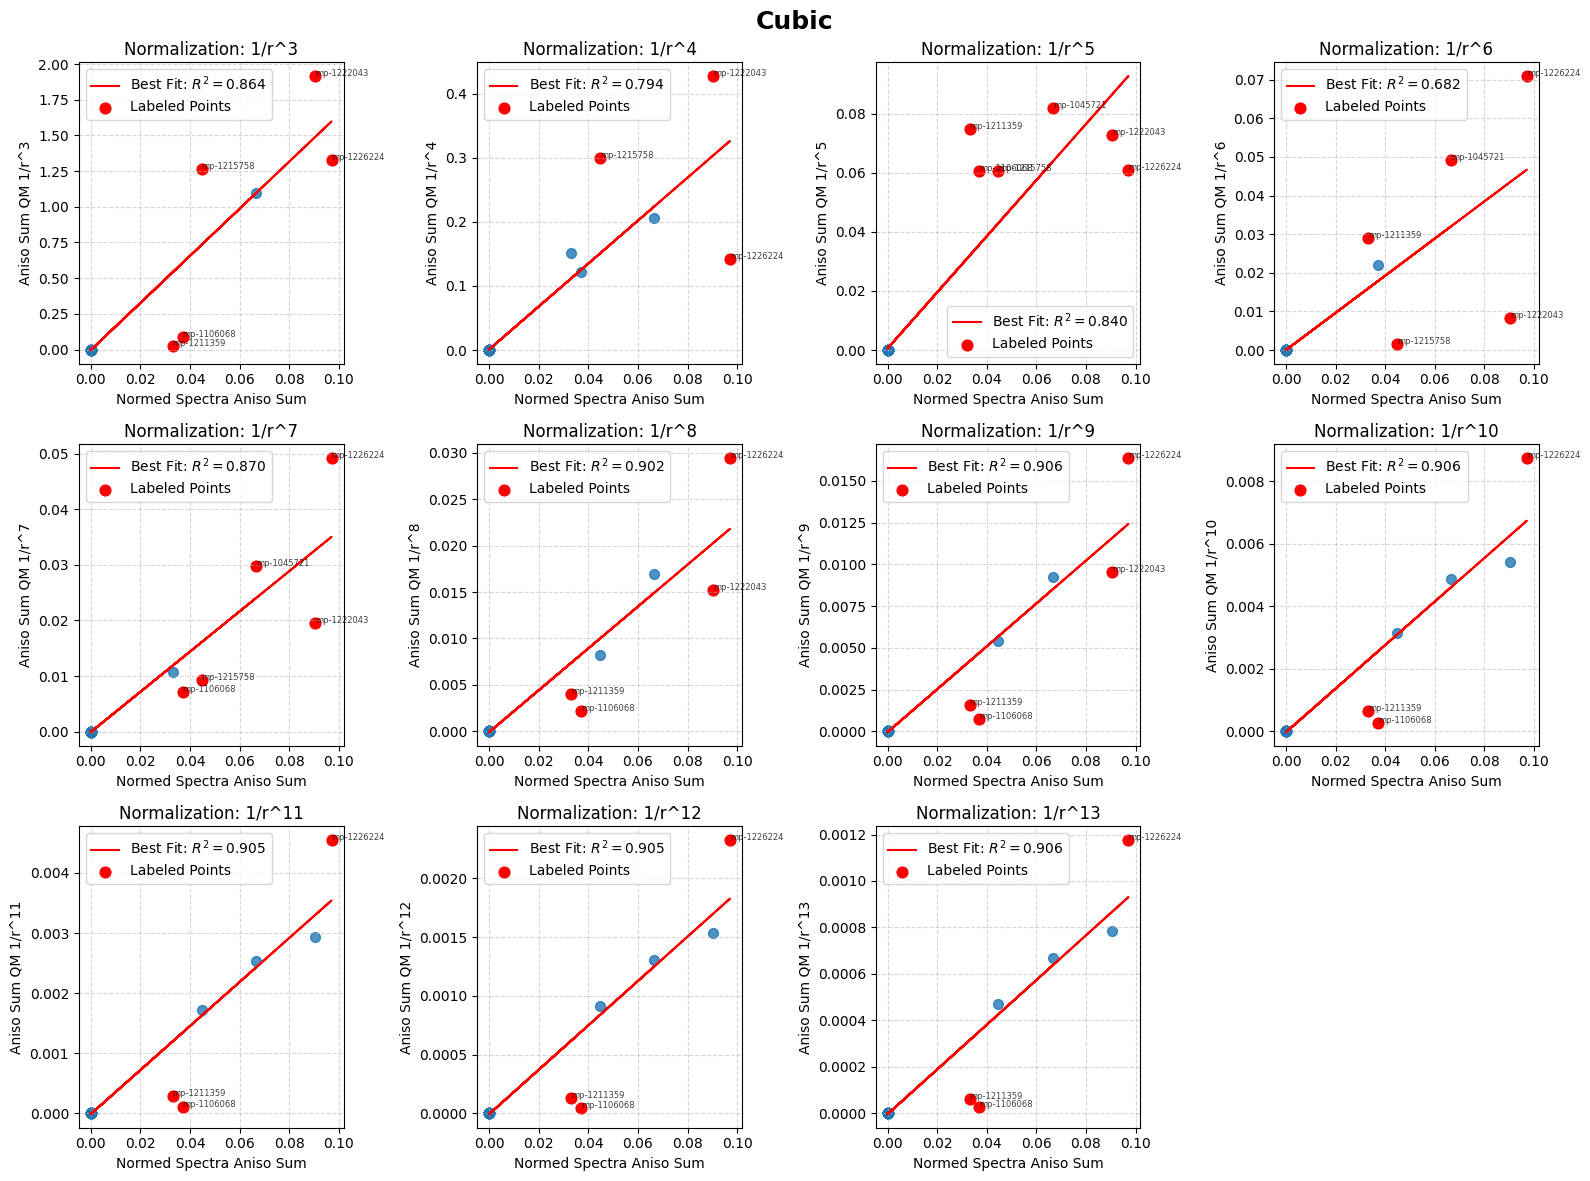

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

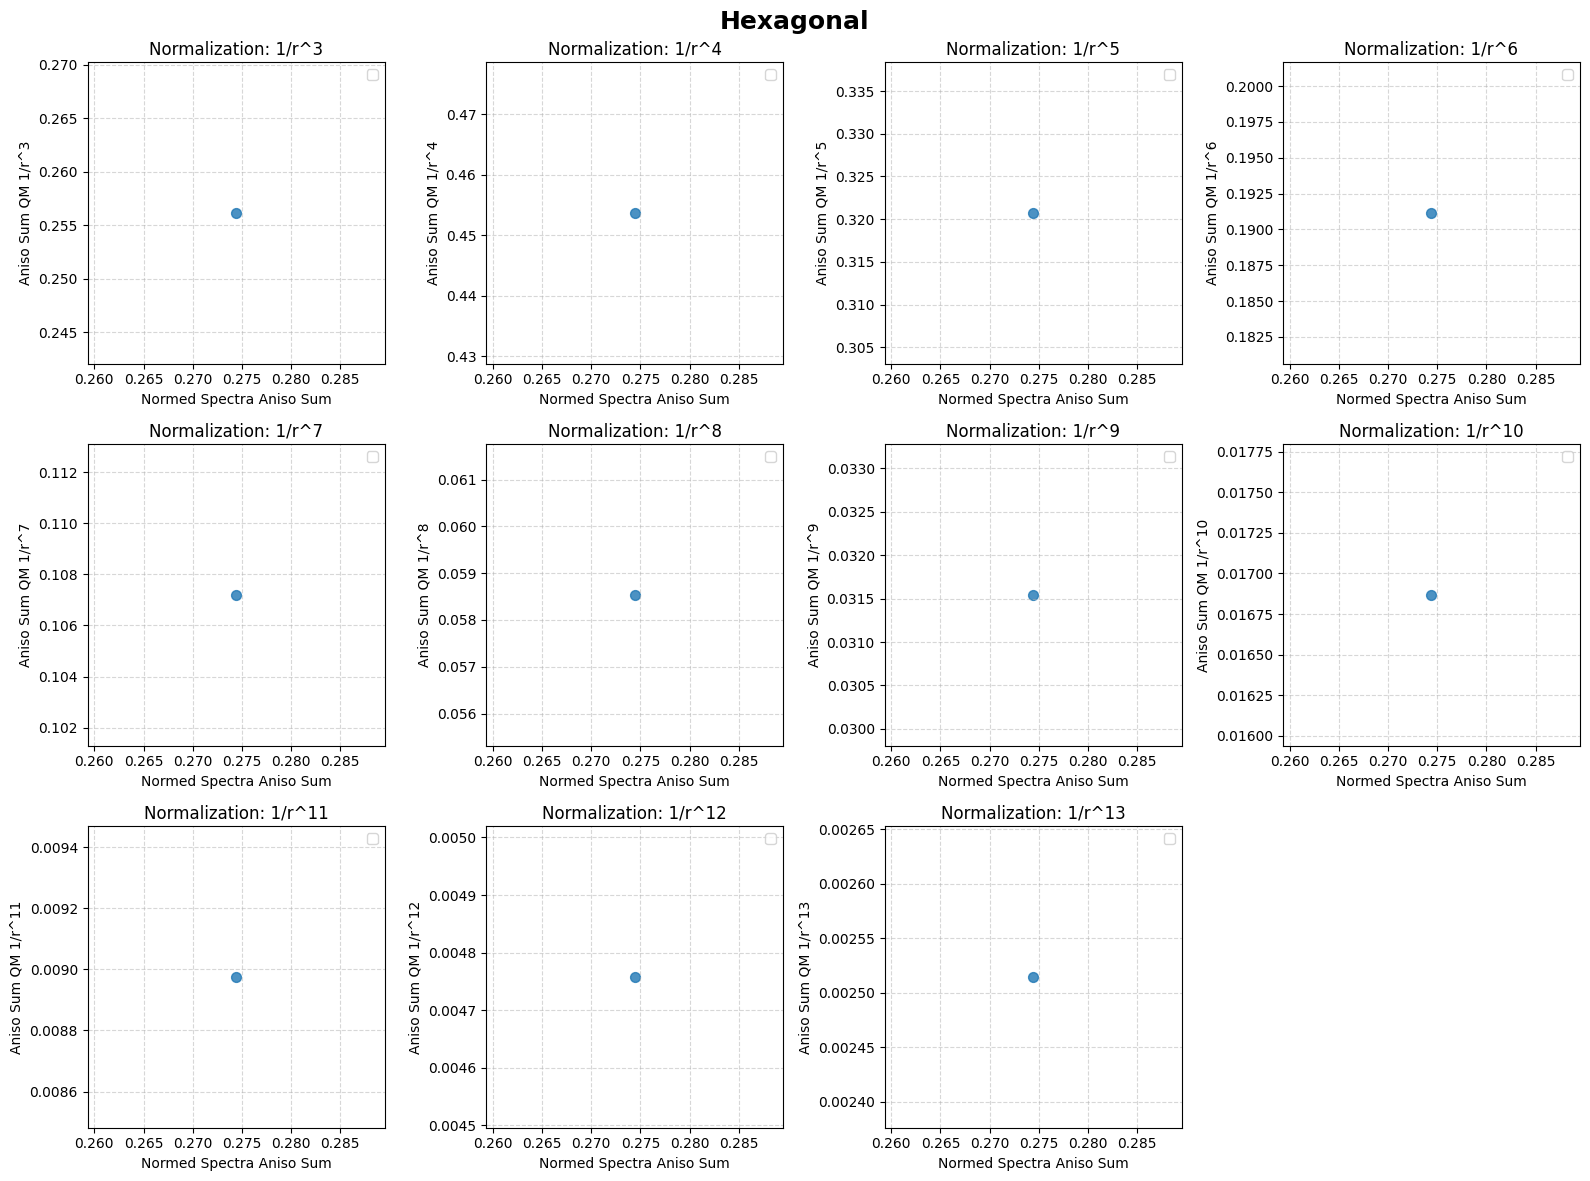

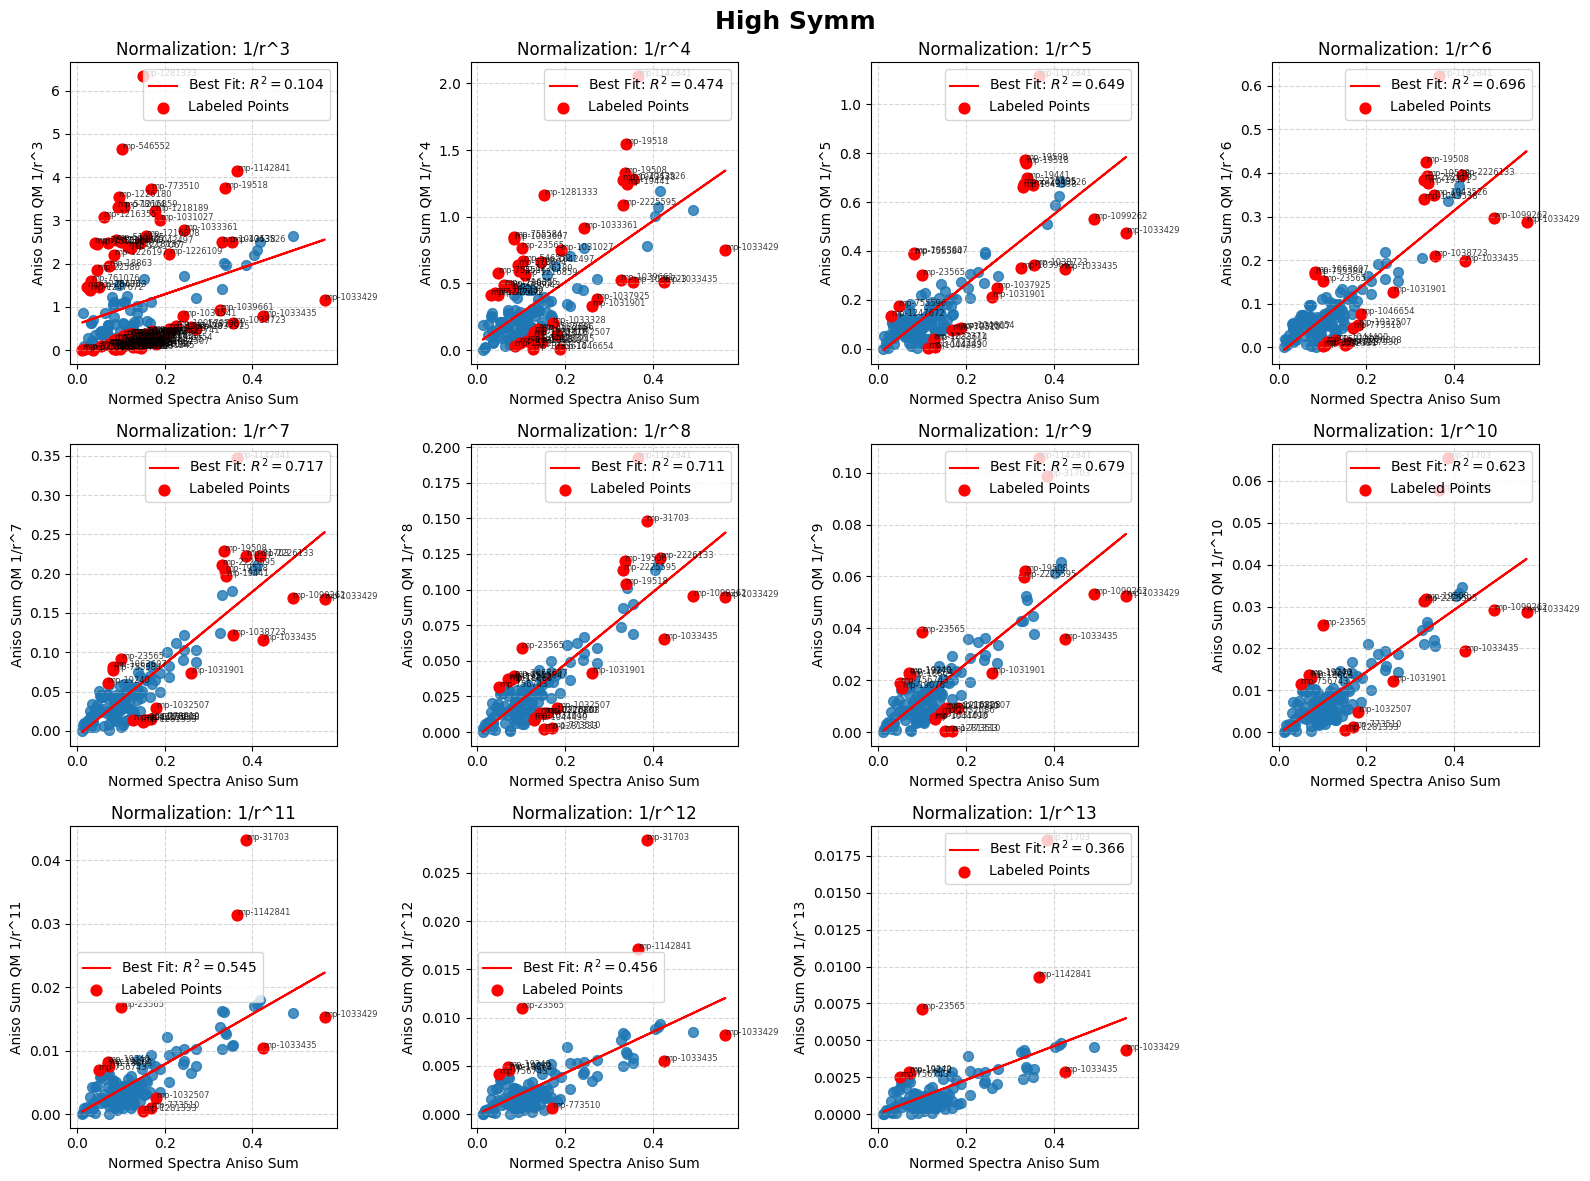

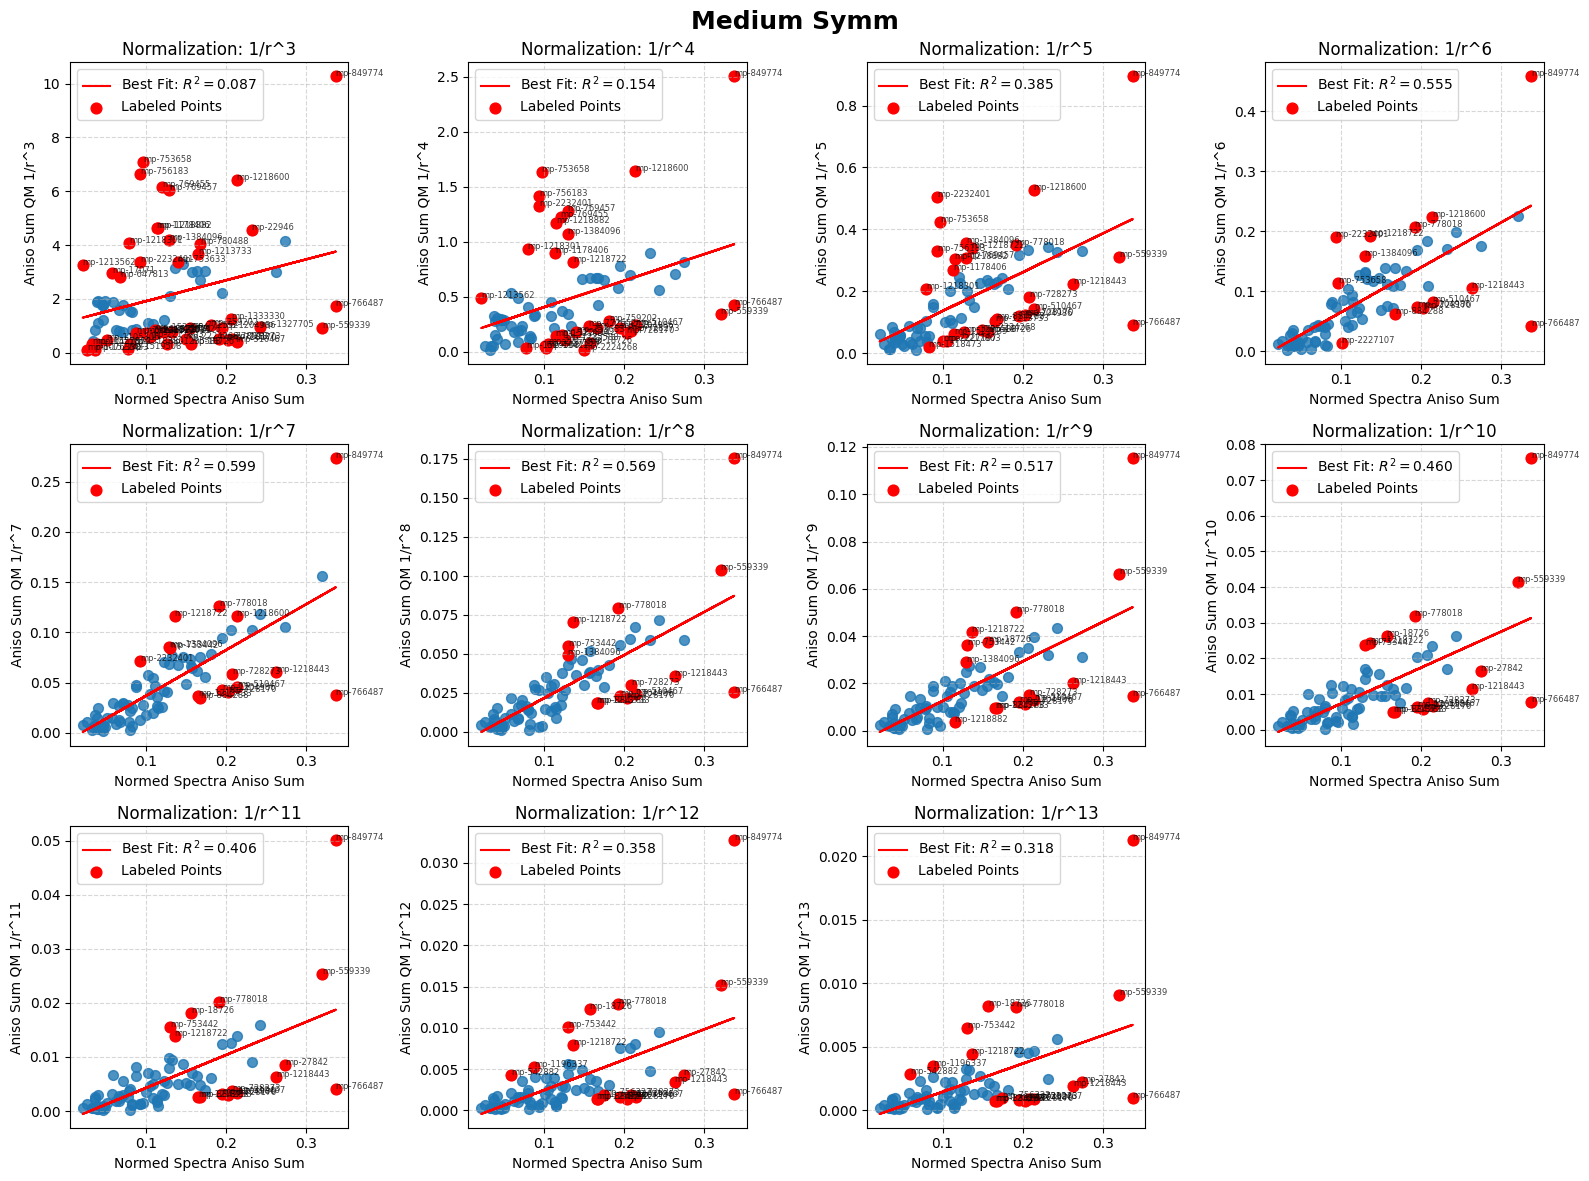

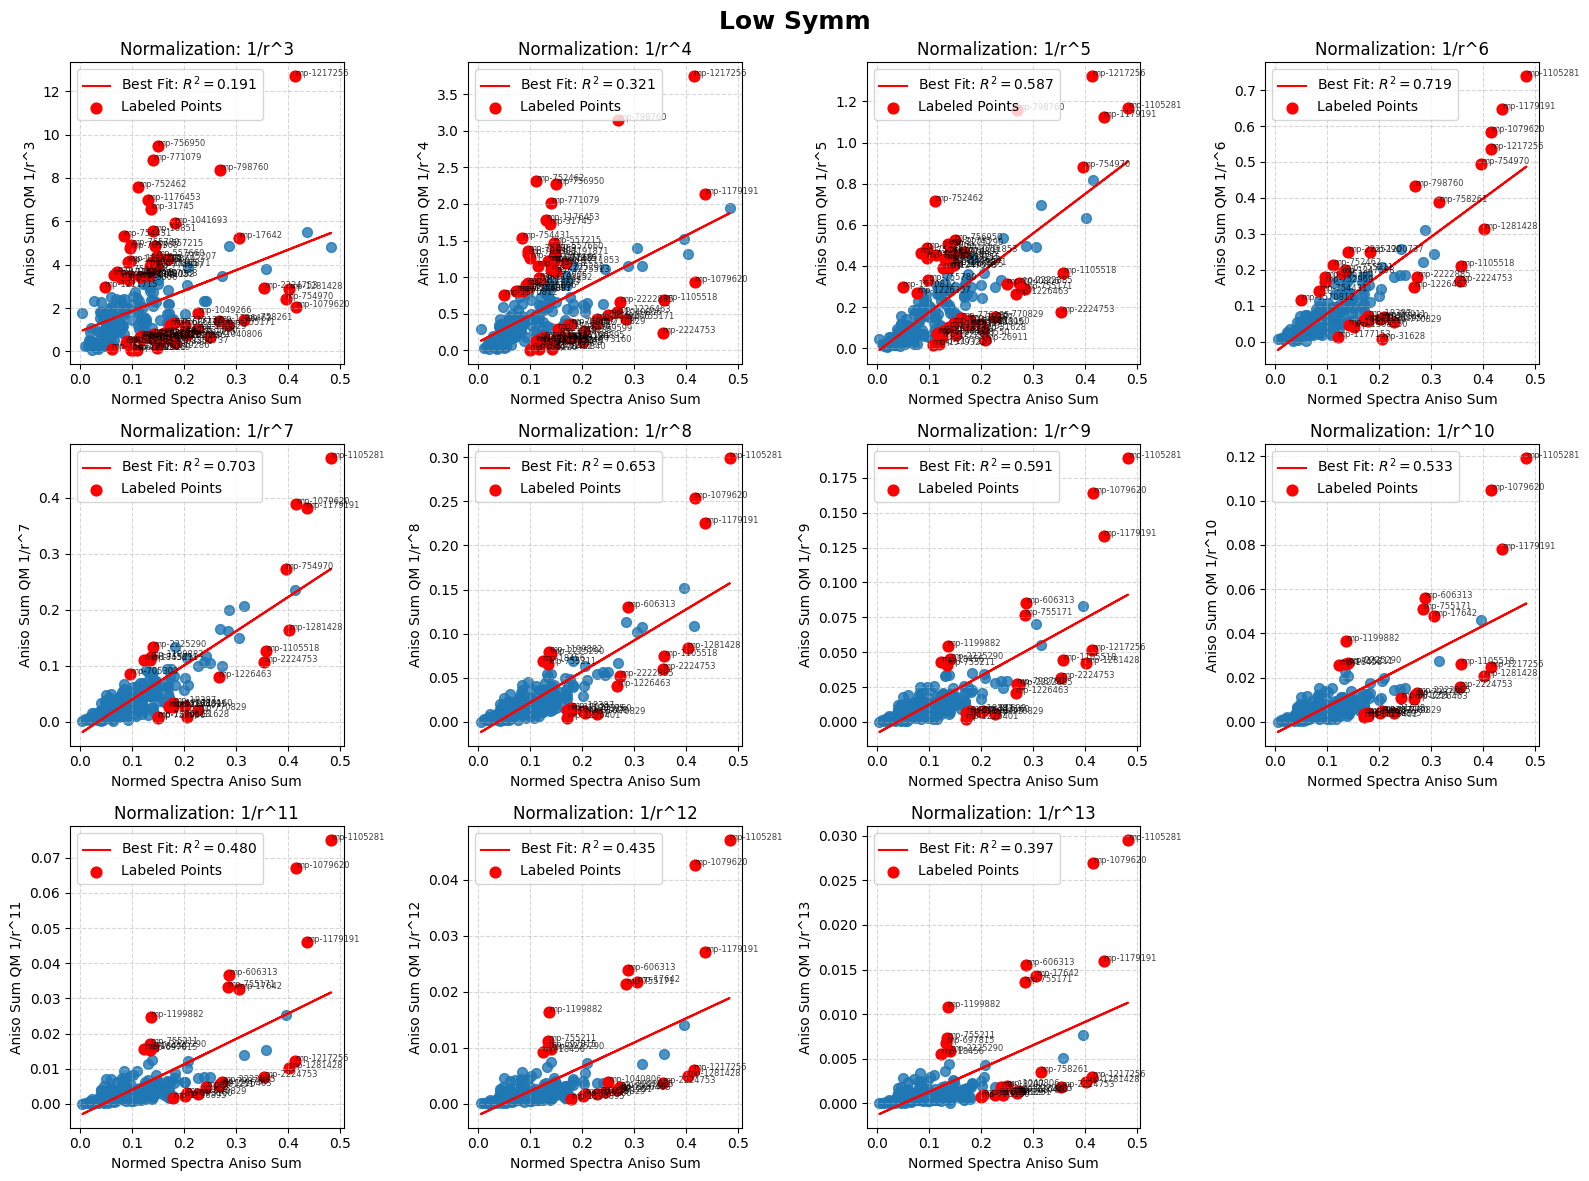

In [96]:
cubic_df_dict = {}
for n in normalization_orders[2:]:
    cubic_df = get_group_df(195, 230, factor_df, f"1/r^{n}")
    cubic_df_dict[n] = cubic_df  # Store each reduced DataFrame

hexagonal_df_dict = {}
for n in normalization_orders[2:]:
    hexagonal_df = get_group_df(168, 194, factor_df, f"1/r^{n}")
    hexagonal_df_dict[n] = hexagonal_df  # Store each reduced DataFrame

high_df_dict = {}
for n in normalization_orders[2:]:
    high_df = get_group_df(75, 167, factor_df, f"1/r^{n}")
    high_df_dict[n] = high_df  # Store each reduced DataFrame

medium_df_dict = {}
for n in normalization_orders[2:]:
    medium_df = get_group_df(16, 74, factor_df, f"1/r^{n}")
    medium_df_dict[n] = medium_df  # Store each reduced DataFrame

low_df_dict = {}
for n in normalization_orders[2:]:
    low_df = get_group_df(1, 15, factor_df, f"1/r^{n}")
    low_df_dict[n] = low_df  # Store each reduced DataFrame

threshold_fraction = 0.1 #Set threshold fraction for labeling

#Dynamic threshold is threshold_fraction * the range of the data set if the residual is greater then the dynamic threshold we put a label on it

# Plot side-by-side scatter plots with labels enabled
plot_aniso_data_side_by_side(cubic_df_dict, "Normed Spectra Aniso Sum", "Aniso Sum QM", labels=True, main_title="Cubic", threshold_fraction=threshold_fraction)
plot_aniso_data_side_by_side(hexagonal_df_dict, "Normed Spectra Aniso Sum", "Aniso Sum QM", labels=True, main_title="Hexagonal", threshold_fraction=threshold_fraction)
plot_aniso_data_side_by_side(high_df_dict, "Normed Spectra Aniso Sum", "Aniso Sum QM", labels=True, main_title="High Symm", threshold_fraction=threshold_fraction)
plot_aniso_data_side_by_side(medium_df_dict, "Normed Spectra Aniso Sum", "Aniso Sum QM", labels=True, main_title="Medium Symm", threshold_fraction=threshold_fraction)
plot_aniso_data_side_by_side(low_df_dict, "Normed Spectra Aniso Sum", "Aniso Sum QM", labels=True, main_title="Low Symm", threshold_fraction=threshold_fraction)


### Combine all of the group dicts and plot

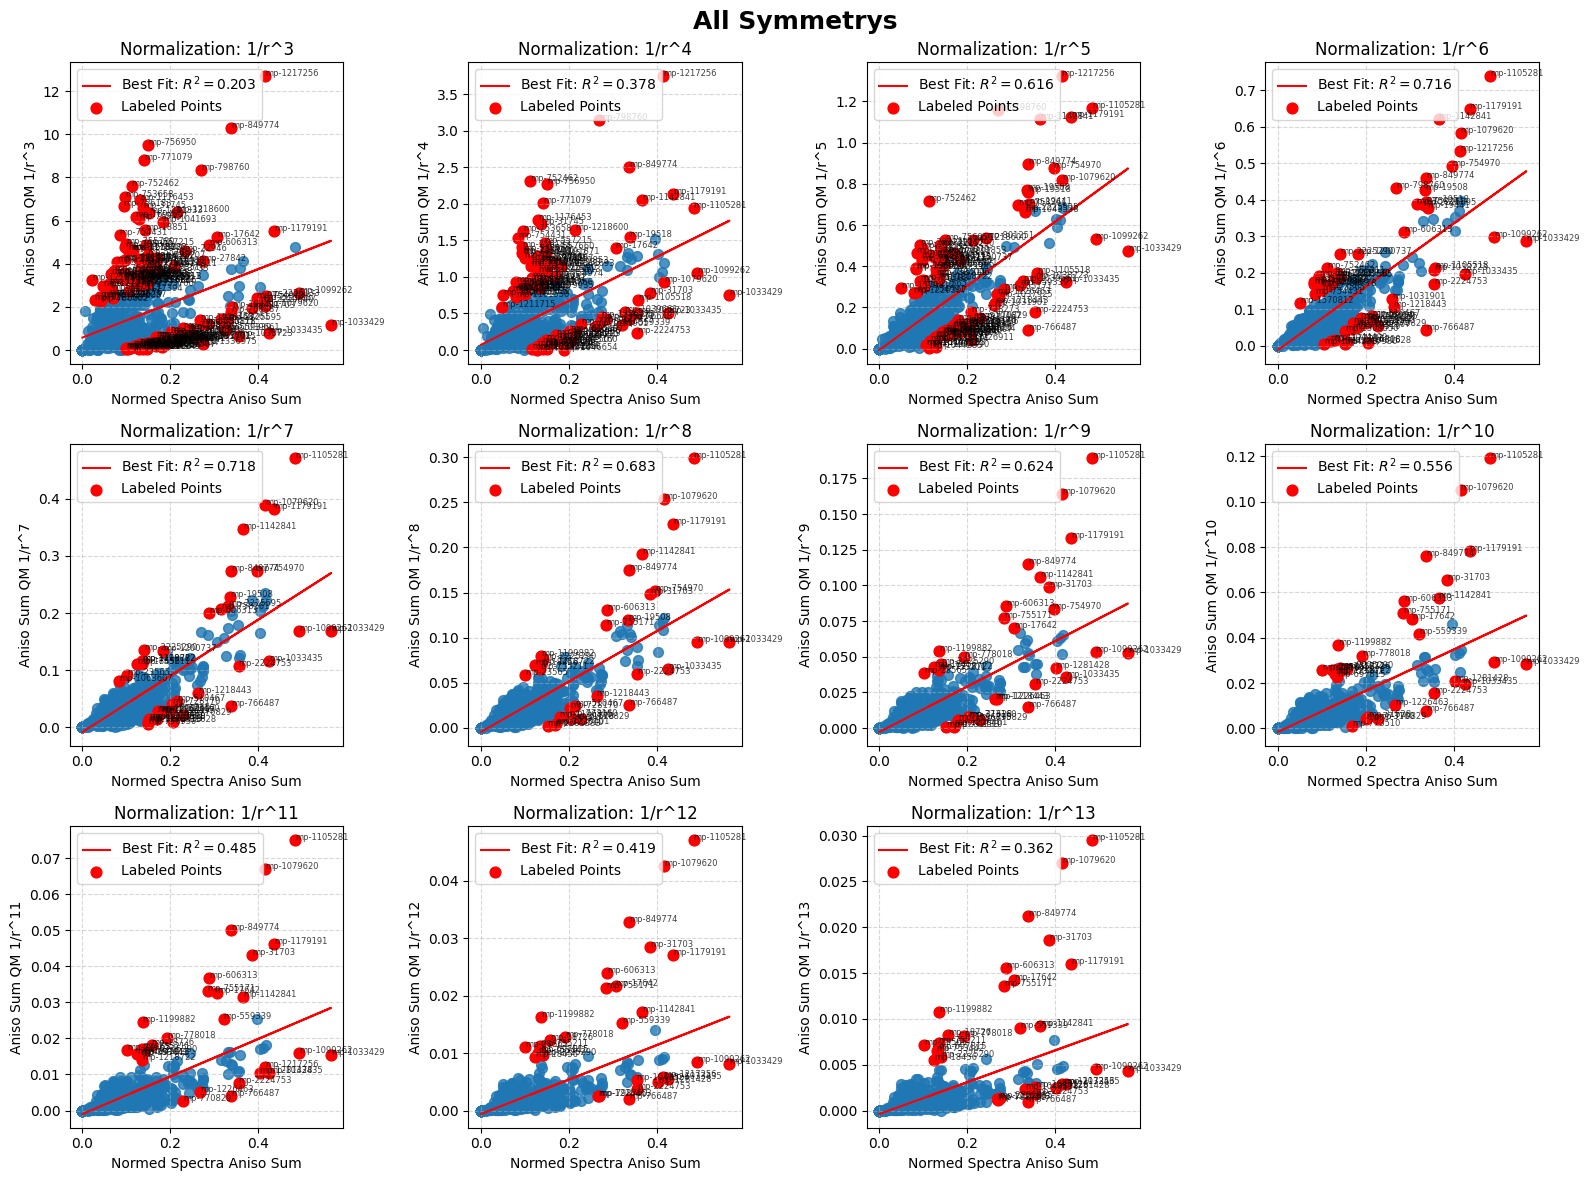

In [97]:
# Combine all the dictionaries by concatenating DataFrames with the same key
combined_df_dict = {}
for n in normalization_orders[2:]:
    combined_df_dict[n] = pd.concat([
        cubic_df_dict[n],
        hexagonal_df_dict[n],
        high_df_dict[n],
        medium_df_dict[n],
        low_df_dict[n]
    ], ignore_index=False)  # Ensures indices are reset

plot_aniso_data_side_by_side(combined_df_dict, "Normed Spectra Aniso Sum", "Aniso Sum QM", labels=True, main_title="All Symmetrys", threshold_fraction = 0.1)

#### Get the mp-id of the materials beyond the threshold for specific n

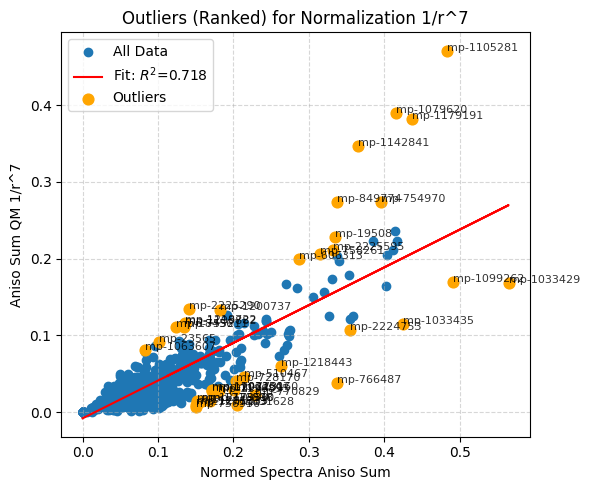

mp-1105281: residual = 0.2416
mp-1079620: residual = 0.1929
mp-1179191: residual = 0.1758
mp-1142841: residual = 0.1755
mp-766487: residual = 0.1202
mp-849774: residual = 0.1156
mp-1033429: residual = 0.1021
mp-754970: residual = 0.0871
mp-1033435: residual = 0.0856
mp-31628: residual = 0.0838
mp-770829: residual = 0.0824
mp-2225290: residual = 0.0734
mp-19508: residual = 0.0716
mp-606313: residual = 0.0667
mp-1099262: residual = 0.0647
mp-773160: residual = 0.0628
mp-1218443: residual = 0.0608
mp-773510: residual = 0.0606
mp-758261: residual = 0.0594
mp-2224753: residual = 0.0590
mp-756950: residual = 0.0589
mp-18456: residual = 0.0583
mp-1218722: residual = 0.0576
mp-2225595: residual = 0.0566
mp-1275513: residual = 0.0563
mp-1199882: residual = 0.0562
mp-1281333: residual = 0.0559
mp-1216808: residual = 0.0556
mp-1196895: residual = 0.0541
mp-1217930: residual = 0.0529
mp-755211: residual = 0.0523
mp-1200737: residual = 0.0520
mp-510467: residual = 0.0519
mp-1032507: residual = 0.05

In [98]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

def get_ranked_outlier_mp_ids(df_dict, x_col, y_col, n, threshold_fraction=0.1, plot=True, top_k=None):
    """
    Returns and optionally plots MP-IDs outside the dynamic threshold for a given exponent n,
    ranked from most to least distant from the line of best fit.

    Parameters:
        df_dict (dict): Dictionary with keys as exponents and values as DataFrames.
        x_col (str): Column name for x-axis data.
        y_col (str): Base y-axis column name (prefix before 1/r^n).
        n (int or str): The exponent to analyze.
        threshold_fraction (float): Fraction of y-range used to define threshold.
        plot (bool): Whether to show a scatter plot with annotated outliers.
        top_k (int or None): If set, only return and annotate the top_k largest outliers.

    Returns:
        List[Tuple[str, float]]: List of (MP-ID, residual) sorted from largest to smallest.
    """
    df = df_dict[n]
    x_data = df[x_col]
    y_data = df[f"{y_col} 1/r^{n}"]

    # Line of best fit
    slope, intercept, r_value, _, _ = linregress(x_data, y_data)
    best_fit_line = slope * np.array(x_data) + intercept
    residuals = np.abs(y_data - best_fit_line)

    # Dynamic threshold
    dynamic_threshold = threshold_fraction * (y_data.max() - y_data.min())
    outlier_mask = residuals > dynamic_threshold

    # Extract and sort outliers
    outlier_mp_ids = df.index[outlier_mask]
    outlier_residuals = residuals[outlier_mask]
    ranked_outliers = sorted(
        zip(outlier_mp_ids, outlier_residuals),
        key=lambda x: x[1],
        reverse=True
    )

    # Optionally truncate to top_k
    if top_k is not None:
        ranked_outliers = ranked_outliers[:top_k]

    if plot:
        plt.figure(figsize=(6, 5))
        plt.scatter(x_data, y_data, label="All Data", color='tab:blue')
        plt.plot(x_data, best_fit_line, color='red', label=f"Fit: $R^2$={r_value**2:.3f}")

        # Highlight outliers
        outlier_indices = [mp_id for mp_id, _ in ranked_outliers]
        plt.scatter(x_data.loc[outlier_indices], y_data.loc[outlier_indices], color='orange', s=60, label="Outliers")

        # Annotate each outlier
        for mp_id, res in ranked_outliers:
            plt.annotate(mp_id, (x_data.loc[mp_id], y_data.loc[mp_id]), fontsize=8, alpha=0.8)

        plt.xlabel(x_col)
        plt.ylabel(f"{y_col} 1/r^{n}")
        plt.title(f"Outliers (Ranked) for Normalization 1/r^{n}")
        plt.grid(True, linestyle="--", alpha=0.5)
        plt.legend()
        plt.tight_layout()
        plt.show()

    return ranked_outliers


ranked_outliers = get_ranked_outlier_mp_ids(combined_df_dict, "Normed Spectra Aniso Sum", "Aniso Sum QM", n=7, plot=True)
for mpid, residual in ranked_outliers:
    print(f"{mpid}: residual = {residual:.4f}")


Plot the outlier residuals

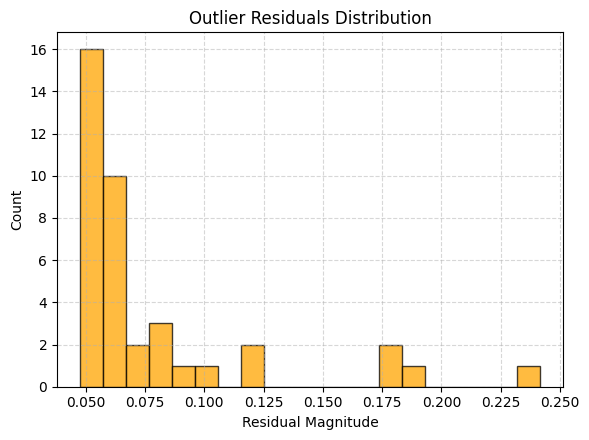

In [99]:
def plot_outlier_residuals(ranked_outliers, bins=20, title="Outlier Residuals Distribution"):
    """
    Plot histogram of residuals for ranked outliers.

    Parameters:
        ranked_outliers (list of tuples): [(mp_id, residual), ...] sorted from largest to smallest.
        bins (int): Number of bins in histogram.
        title (str): Title of the plot.

    Returns:
        None
    """
    residuals = [res for _, res in ranked_outliers]

    plt.figure(figsize=(6, 4.5))
    plt.hist(residuals, bins=bins, color='orange', edgecolor='black', alpha=0.75)
    plt.xlabel("Residual Magnitude")
    plt.ylabel("Count")
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_outlier_residuals(ranked_outliers)

##### Plot QM aniso sum and Spectra aniso sum for a list of mp_id

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


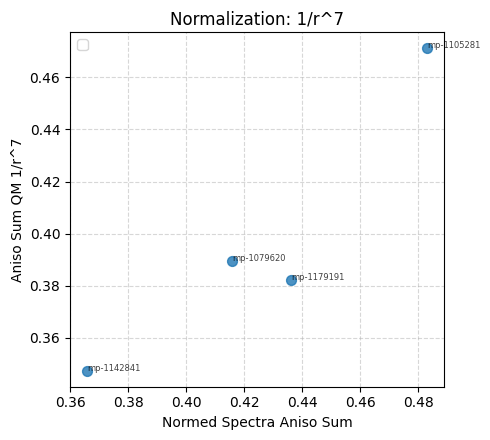

([],
             Space Group                            Group Name  \
 Materials                                                       
 mp-1142841          130  High Symmetry (Tetragonal, Trigonal)   
 mp-1079620            4  Low Symmetry (Triclinic, Monoclinic)   
 mp-1105281           12  Low Symmetry (Triclinic, Monoclinic)   
 mp-1179191           14  Low Symmetry (Triclinic, Monoclinic)   
 
             Aniso Sum QM 1/r^7  Normed Spectra Aniso Sum  Difference Aniso Sum  
 Materials                                                                       
 mp-1142841            0.347290                  0.365793              0.018504  
 mp-1079620            0.389296                  0.415767              0.026471  
 mp-1105281            0.471159                  0.483137              0.011978  
 mp-1179191            0.382199                  0.436098              0.053899  )

In [100]:
def plot_aniso_spectra_vs_qm(df, mp_ids, n, x_col="Normed Spectra Aniso Sum", y_col="Aniso Sum QM", 
                             annotate=True, verbose=True):
    """
    Plots Aniso Sum QM 1/r^n (y-axis) vs. Normed Spectra Aniso Sum (x-axis) for selected MP-IDs.
    Matches formatting of plot_aniso_data_side_by_side.

    Parameters:
        df (pd.DataFrame): DataFrame indexed by MP-ID.
        mp_ids (list): List of MP-IDs to plot.
        n (int or str): Exponent used in the y-axis column (QM 1/r^n).
        x_col (str): Column name for normalized spectra anisotropy sum (x-axis).
        y_col (str): Base column name for QM anisotropy sum (y-axis changes with n).
        annotate (bool): Annotate points with MP-ID.
        verbose (bool): Print any MP-IDs not found in df.

    Returns:
        list: MP-IDs that were not found in the DataFrame.
    """
    # Y-axis column depends on exponent
    y_col_full = y_col + f" 1/r^{n}"

    # Filter for available MP-IDs
    available_ids = df.index.intersection(mp_ids)
    missing_ids = list(set(mp_ids) - set(available_ids))

    if available_ids.empty:
        raise ValueError("None of the provided MP-IDs are in the DataFrame.")

    filtered = df.loc[available_ids]
    x_data = filtered[x_col]
    y_data = filtered[y_col_full]

    # Plotting
    plt.figure(figsize=(5, 4.5))
    plt.scatter(x_data, y_data, s=50, alpha=0.8, color='tab:blue')


    if annotate:
        for mp_id in available_ids:
            plt.annotate(mp_id,
                         (filtered.loc[mp_id, x_col], filtered.loc[mp_id, y_col_full]),
                         fontsize=6, alpha=0.75)

    plt.title(f"Normalization: 1/r^{n}", fontsize=12)
    plt.xlabel(x_col, fontsize=10)
    plt.ylabel(y_col_full, fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

    if verbose and missing_ids:
        print(f"[Warning] MP-IDs not found in DataFrame:\n{missing_ids}")

    return missing_ids, filtered


outlier_mpid = ["mp-1105281",
"mp-1079620",
"mp-1179191",
"mp-1142841",
]


plot_aniso_spectra_vs_qm(combined_df_dict[7], outlier_mpid, 7 , "Normed Spectra Aniso Sum", "Aniso Sum QM",
                             annotate=True, verbose=True)